# Statistical Analysis Exercise 3

## Question 1(a)

In [24]:
# this is the path for the data
path <- "C:/Users/James/Documents/GitHub/birckbeck_applied_statistics/Year1/Statistical Analysis/Data/oil.txt"

# load in the file as a dataframe here
data <- read.csv2(path, sep = "\t", header = FALSE)

# change the column names
colnames(data) <- c("spirit", "gravity", "pressure", "distil", "endpoint")

head(data)

,spirit,gravity,pressure,distil,endpoint
,<chr>,<chr>,<chr>,<int>,<int>
1,6.9,38.4,6.1,220,235
2,14.4,40.3,4.8,231,307
3,7.4,40,6.1,217,212
4,8.5,31.8,0.2,316,365
5,8,40.8,3.5,210,218
6,2.8,41.3,1.8,267,235


In [25]:
for (col in colnames(data)){
    data[, col] <- as.numeric(data[, col])
}

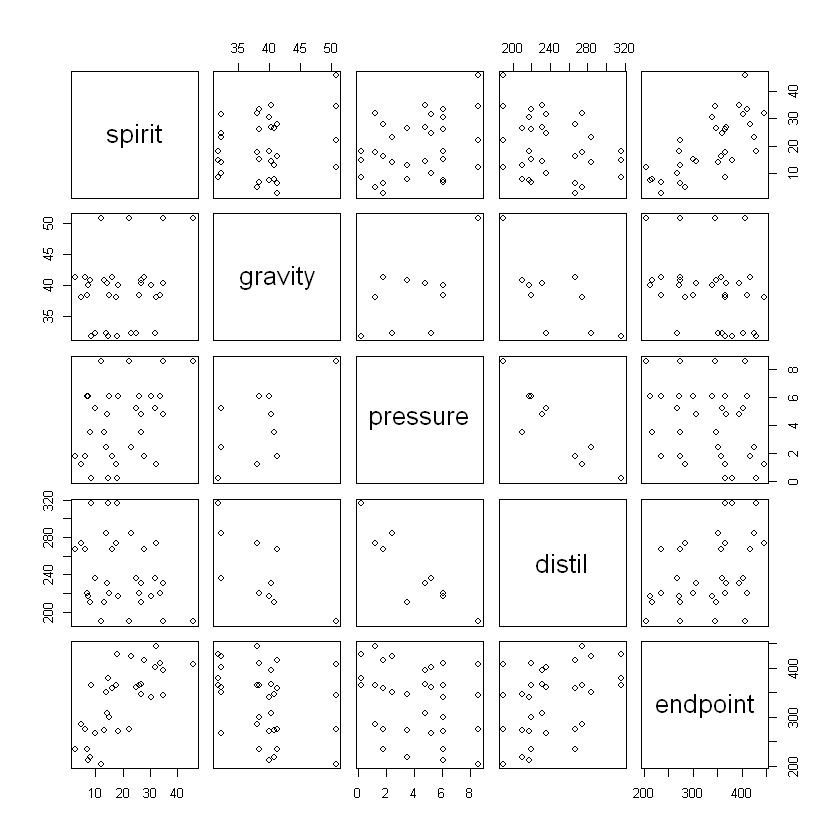

In [26]:
pairs(data)

In [27]:
cor(data)

,spirit,gravity,pressure,distil,endpoint
spirit,1.0000000,0.2463260,0.3840706,-0.3150243,0.7115262
gravity,0.2463260,1.0000000,0.6205867,-0.7001539,-0.3216782
pressure,0.3840706,0.6205867,1.0000000,-0.9062248,-0.2979843
distil,-0.3150243,-0.7001539,-0.9062248,1.0000000,0.4122466
endpoint,0.7115262,-0.3216782,-0.2979843,0.4122466,1.0000000


Lets get some better plots of the explanatory variables and the dependent variable

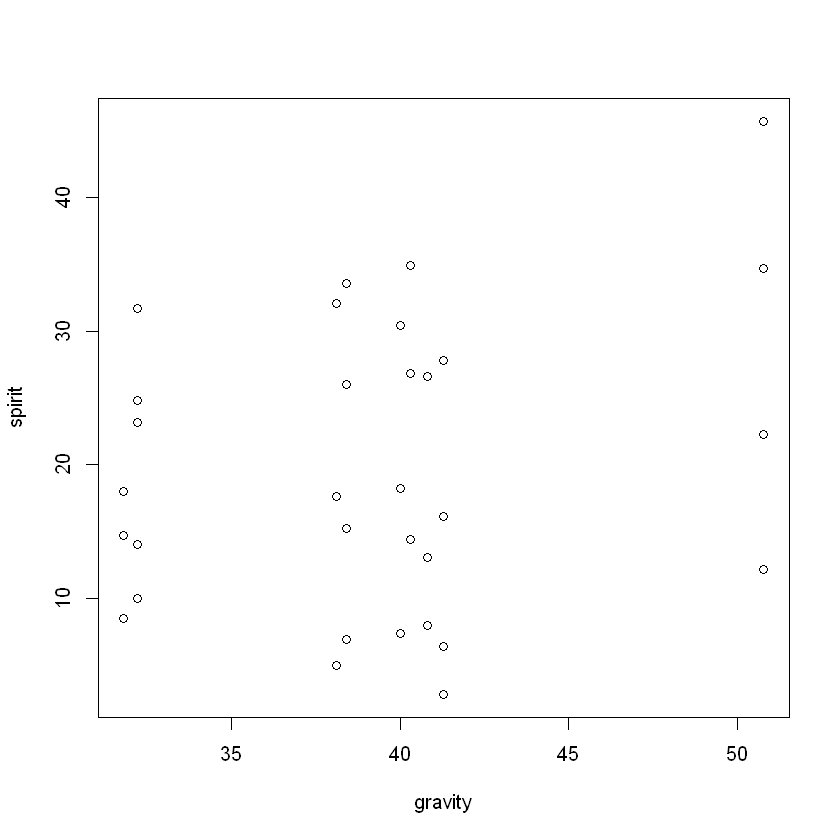

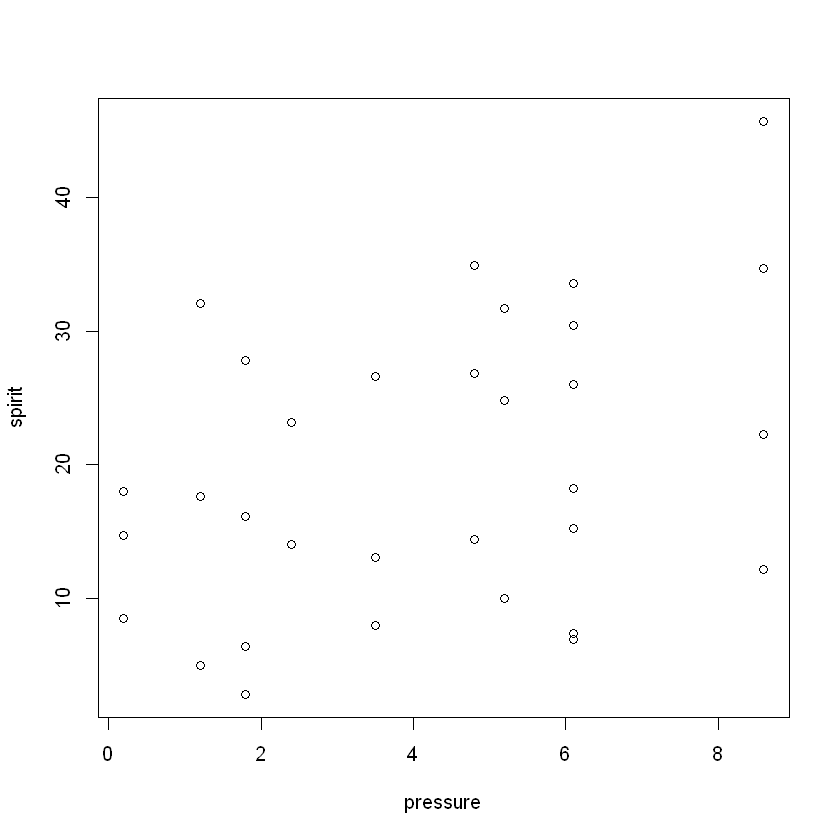

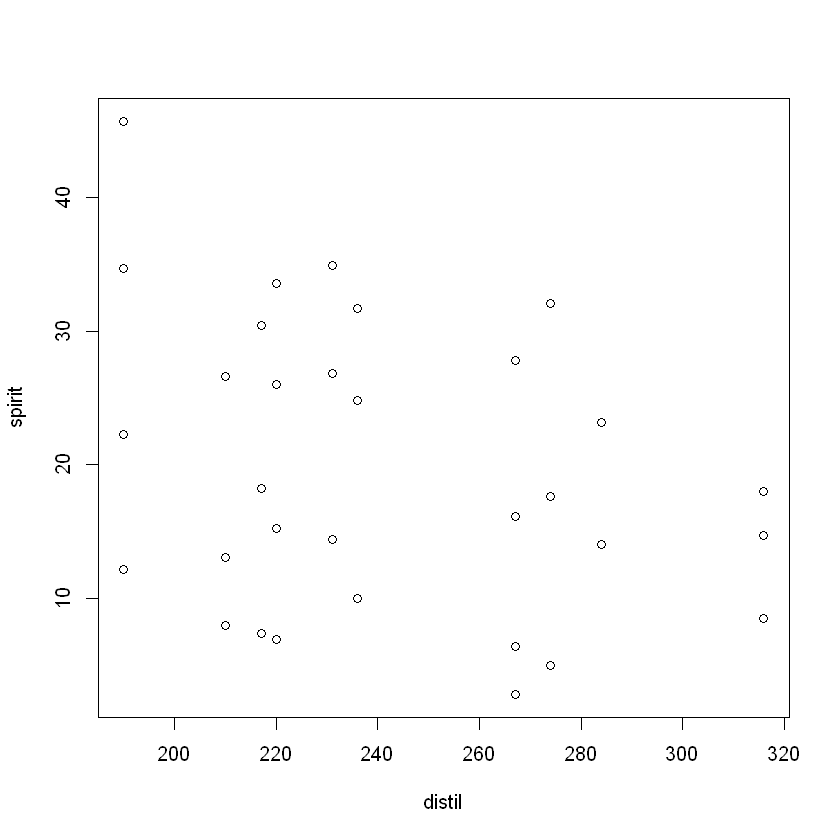

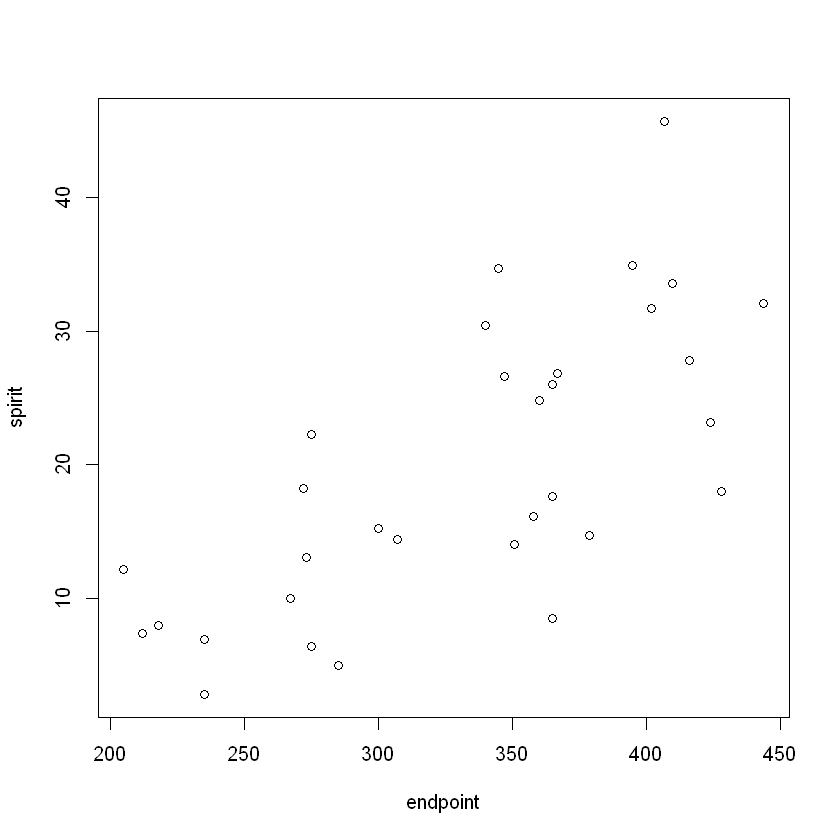

In [28]:
for (col in colnames(data)[2:5]){
    plot(data[, c(col)], data[, c("spirit")], xlab=col, ylab="spirit")
}

Based on the scatter plots above, it looks like endpoint is the explanatory variable that has the strongest linear relationship with spirit. This is supported by the fact that the correlation between spirit and endpoint has the largest magnitude of all the correlations with spirit. 

In [29]:
model1 <- lm("spirit ~ endpoint + distil", data = data)

In [30]:
summary(model1)


Call:
lm(formula = "spirit ~ endpoint + distil", data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9593 -1.9063 -0.3711  1.6242  4.3802 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.467633   3.009009   6.137 1.09e-06 ***
endpoint     0.155813   0.006855  22.731  < 2e-16 ***
distil      -0.209329   0.012737 -16.435 3.11e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.426 on 29 degrees of freedom
Multiple R-squared:  0.9521,	Adjusted R-squared:  0.9488 
F-statistic: 288.4 on 2 and 29 DF,  p-value: < 2.2e-16


The model proposed was $spirit_i = \alpha + \beta_1 endpoint_i + \beta_2 distil_i + \epsilon_i$, and the model summary is given above. In the proposed model, all the estimated values are highly significant, and the $\bar{R}^2$ is also very high, indicating a good fit, and strong evidence of a linear relationship between spirit, and the explanatory variables.

## 1(b)

In [31]:
prediction_data <- data.frame("endpoint"=c(400), "distil"=c(200))

In [32]:
confidence_interval <- predict(model1, prediction_data, interval=c("confidence"))
prediction_interval <- predict(model1, prediction_data, interval=c("prediction"))

In [33]:
confidence_interval

,fit,lwr,upr
1,38.92724,37.00562,40.84885


In [34]:
prediction_interval

,fit,lwr,upr
1,38.92724,33.60731,44.24717


## Question 2

In [36]:
# this is the path for the data
path <- "C:/Users/James/Documents/GitHub/birckbeck_applied_statistics/Year1/Statistical Analysis/Data/sugar.txt"

# load in the file as a dataframe here
data <- read.csv2(path, sep = "\t", header = TRUE)

head(data)

,price,consump
,<chr>,<chr>
1,9.485,39.375
2,10.163,37.607
3,11.426,35.254
4,11.566,35.714
5,10.713,37.513
6,9.798,42.120


In [37]:
# this changes the data types of the columns to numerics. When we load them into the script, they are characters for some reason
for (col in colnames(data)){
    data[, col] <- as.numeric(data[, col])
}

In [38]:
data["lconsump"] = log(data["consump"])

In [40]:
model2 <- lm("lconsump ~ price", data = data)

summary(model2)


Call:
lm(formula = "lconsump ~ price", data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.206114 -0.068467  0.004681  0.059175  0.235160 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.081099   0.038202  133.00   <2e-16 ***
price       -0.138536   0.005731  -24.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0877 on 53 degrees of freedom
Multiple R-squared:  0.9168,	Adjusted R-squared:  0.9153 
F-statistic: 584.3 on 1 and 53 DF,  p-value: < 2.2e-16
